# Trabajo Final - Python para Inteligencia Artificial

**Profesor: Iván Fuertes**

**Alumno: Carolina Londoño Idárraga**



---

# Introducción

El presente trabajo de exploración de información es con el objetivo de encontrar los patrones de comportamiento y estilo de vida en pacientes con demencia leve a moderada

# Enfermedad de ALZHEIMER
La enfermedad de ALZHEIMER es un desorden neurodegenerativo de causa desconocida que afecta a los adultos mayores y es la causa más común de demencia.
La manifestación clínica más temprana es el deterioro de la memoria selectiva y aunque hay tratamientos  disponibles para mejorar algunos síntomas, aún no se conoce cura de la enfermedad.

Las imagenes cerebrales por resonancia magnética se utilizan para la evaluación de los pacientes con sospecha de alzheimer.
Una detección temprana de la enfermedad permite guiar a los médicos a una terapia de los pacientes que ayudará a disminuir un deterioro precoz de los mismos.

# Datos
El siguiente trabajo se basa en una muestra tomada del proyecto OASIS (Open Access Series of Imaging Studies) que está disponible tanto en su sitio web como en Kaggle, en la cual se encuentran pacientes con demencia leve a moderada.

Se usaron los datos de resonancia magnética longitudinal.
El conjunto de datos consta de datos de resonancia magnética longitudinal de 150 pacientes de 60 a 96 años.
Cada sujeto fue escaneado al menos una vez.
Todos los pacientes son diestros.
72 de los sujetos fueron agrupados como "no dementes" a lo largo del estudio
64 de los sujetos fueron agrupados como "dementes" en el momento de sus visitas iniciales y permanecieron así durante todo el estudio
14 sujetos fueron agrupados como "no dementes" en el momento de su visita y posteriormente fueron caracterizados como 'dementes' en una visita posterior (Estos entran en la categoría de convertidos).


Descarga de Datos Fuentes: http://www.oasis-brains.org/pdf/oasis_longitudinal.csv


# Descripción de las columnas


1) EDUC - Años de educación

2) SES - Estatus socioeconómico

3) MMSE - Mini exámen del estado mental

4) CDR - Rango de demencia clínica

5) eTIV - Volumen intracraneal estimado

6) nWBV - Normalizar el volumen total del cerebro

7) ASF - Factor de escala del atlas

8) M/F - Género

9) Hand - Si el paciente es diestro o zurdo

10) Group - Grupo donde fue alojado el paciente durante las consultas

11)  Visit - Número de visitas al médico




*Se añade el módulo pandas-profiling el cual nos permite hacer un análisis exploratorio de datos y generar informes fáciles de leer

In [72]:
pip install -U pandas-profiling


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [73]:
# carga de librerías para el análisis de datos

import pandas as pd
import numpy as np
from os import path

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from pandas_profiling import ProfileReport

In [74]:
from os import path
alzheimer_path = path.join('oasis_longitudinal.csv')
df = pd.read_csv(alzheimer_path)



En esta sección, nos hemos enfocado en explorar la relación entre cada característica de las pruebas de MRI y la demencia del paciente. 
La razón por la que realizamos este proceso de Análisis Exploratorio de Datos es para establecer la relación de los datos de manera 
explícita a través de un gráfico para que pudiéramos asumir las correlaciones antes de la extracción o el análisis de los datos. 

Esto podría ayudarnos a comprender la naturaleza de los datos y a seleccionar el método de análisis adecuado para el modelo más 
adelante.

In [87]:
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  354 non-null    object 
 1   MRI ID      354 non-null    object 
 2   Group       354 non-null    object 
 3   Visit       354 non-null    int64  
 4   MR Delay    354 non-null    int64  
 5   M/F         354 non-null    object 
 6   Hand        354 non-null    object 
 7   Age         354 non-null    int64  
 8   EDUC        354 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        354 non-null    float64
 11  CDR         354 non-null    float64
 12  eTIV        354 non-null    int64  
 13  nWBV        354 non-null    float64
 14  ASF         354 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 52.4+ KB


In [88]:
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


A continuación utilizaré algunas técnicas de limpieza de datos, Este código cargará el archivo CSV y aplicará los métodos para limpiar los datos, eliminando las filas y columnas con valores faltantes, convirtiendo las columnas 'M/F' y 'Group' a columnas binarias y normalizando los valores en las columnas 'MR Delay' y 'Age'. Luego, imprimirá las primeras cinco filas del dataframe limpio.

In [89]:
# Eliminar filas con valores faltantes en cualquier columna
df.dropna(inplace=True)

# Convertir la columna 'M/F' a una columna binaria
df['M/F'] = df['M/F'].apply(lambda x: 1 if x == 'M' else 0)

# Eliminar las columnas 'Hand' y 'Subject ID'
df.drop(['Hand', 'Subject ID'], axis=1, inplace=True)

# Convertir la columna 'Group' a una columna binaria
df['Group'] = df['Group'].apply(lambda x: 1 if x == 'Demented' else 0)

# Normalizar los valores en la columna 'MR Delay'
df['MR Delay'] = (df['MR Delay'] - df['MR Delay'].min()) / (df['MR Delay'].max() - df['MR Delay'].min())

# Normalizar los valores en la columna 'Age'
df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

# Imprimir las primeras cinco filas del dataframe
print(df.head())

          MRI ID  Group  Visit  MR Delay  M/F       Age  EDUC  SES  MMSE  CDR  \
0  OAS2_0001_MR1      0      1  0.000000    1  0.710526    14  2.0  27.0  0.0   
1  OAS2_0001_MR2      0      2  0.173172    1  0.736842    14  2.0  30.0  0.0   
5  OAS2_0004_MR1      0      1  0.000000    0  0.736842    18  3.0  28.0  0.0   
6  OAS2_0004_MR2      0      2  0.203865    0  0.789474    18  3.0  27.0  0.0   
7  OAS2_0005_MR1      0      1  0.000000    1  0.526316    12  4.0  28.0  0.0   

   eTIV   nWBV    ASF  
0  1987  0.696  0.883  
1  2004  0.681  0.876  
5  1215  0.710  1.444  
6  1200  0.718  1.462  
7  1689  0.712  1.039  


In [90]:
# Correlación entre la edad y la demencia
corr_age_dem = df[['Age', 'CDR']].corr().iloc[0,1]
print(f"Correlación entre la edad y la demencia: {corr_age_dem}")

Correlación entre la edad y la demencia: -0.022758526737378246


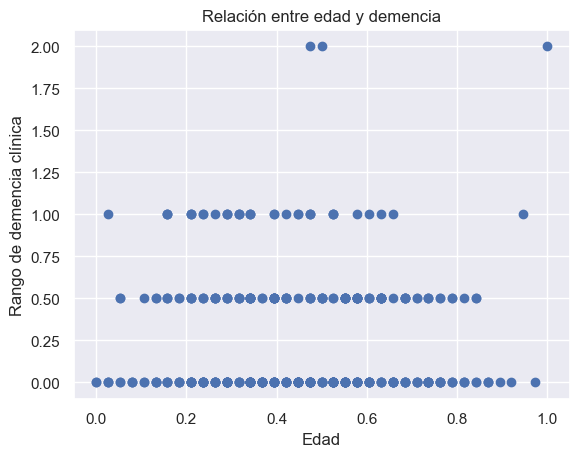

In [91]:
import matplotlib.pyplot as plt

# Gráfica de la relación entre la edad y la demencia
plt.scatter(df['Age'], df['CDR'])
plt.xlabel('Edad')
plt.ylabel('Rango de demencia clínica')
plt.title('Relación entre edad y demencia')
plt.show()

In [50]:
# Correlación entre el estatus socioeconómico y la demencia
corr_ses_dem = df[['SES', 'CDR']].corr().iloc[0,1]
print(f"Correlación entre el estatus socioeconómico y la demencia: {corr_ses_dem}")


Correlación entre el estatus socioeconómico y la demencia: 0.07615998396386595


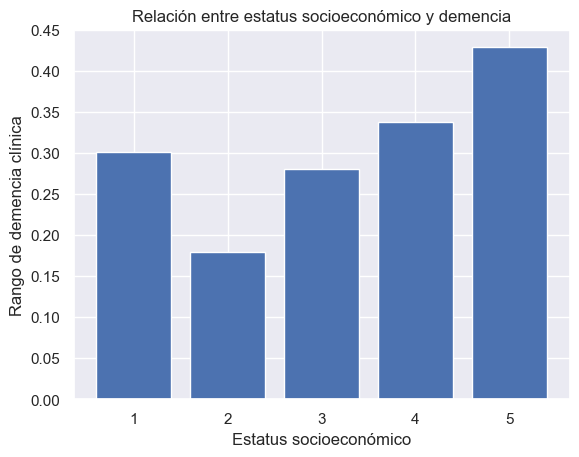

In [51]:

# Gráfica de la relación entre el estatus socioeconómico y la demencia
plt.bar(df.groupby('SES')['CDR'].mean().index, df.groupby('SES')['CDR'].mean().values)
plt.xlabel('Estatus socioeconómico')
plt.ylabel('Rango de demencia clínica')
plt.title('Relación entre estatus socioeconómico y demencia')
plt.show()

In [52]:
# Comparación de volúmenes intracraneales entre pacientes dementes y no dementes
grouped = df.groupby('CDR')
mean_eTIV = grouped['eTIV'].mean()
std_eTIV = grouped['eTIV'].std()

print("Media y desviación estándar de volumen intracraneal según estado de demencia:")
print(mean_eTIV)
print(std_eTIV)


Media y desviación estándar de volumen intracraneal según estado de demencia:
CDR
0.0    1486.859223
0.5    1482.454545
1.0    1528.000000
2.0    1538.000000
Name: eTIV, dtype: float64
CDR
0.0    179.998630
0.5    174.035989
1.0    157.844302
2.0    157.445229
Name: eTIV, dtype: float64


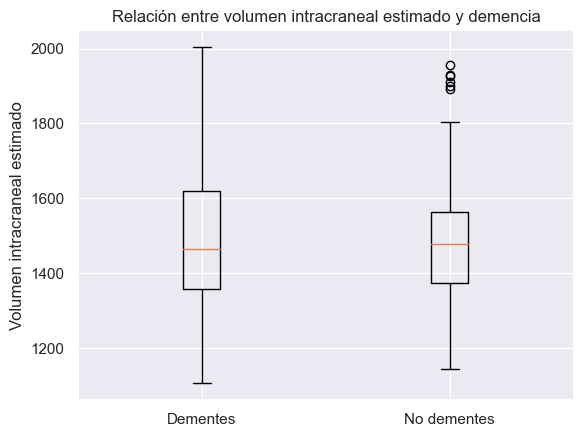

In [57]:
# Graficar de la relación entre el volumen intracraneal estimado y la demencia
plt.boxplot([df[df['Group'] == 0]['eTIV'], df[df['Group'] == 1]['eTIV']])
plt.xticks([1, 2], ['Dementes', 'No dementes'])
plt.ylabel('Volumen intracraneal estimado')
plt.title('Relación entre volumen intracraneal estimado y demencia')
plt.show()


In [58]:
# Comparación de incidencia de demencia entre géneros
gender_dem = df.groupby(['M/F', 'CDR']).size().unstack()
print("Número de pacientes según género y estado de demencia:")
print(gender_dem)


Número de pacientes según género y estado de demencia:
CDR  0.0  0.5  1.0  2.0
M/F                    
0    142   44   16    2
1     64   66   19    1


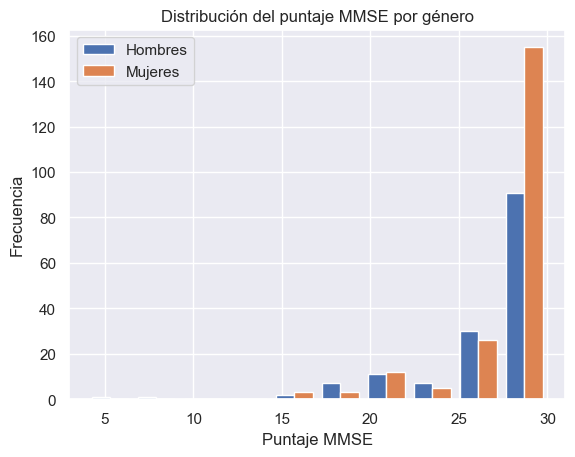

In [61]:

# Grafica de la distribución del puntaje MMSE por género
plt.hist([df[df['M/F'] == 1]['MMSE'], df[df['M/F'] == 0]['MMSE']], label=['Hombres', 'Mujeres'], bins=10)
plt.legend()
plt.xlabel('Puntaje MMSE')
plt.ylabel('Frecuencia')
plt.title('Distribución del puntaje MMSE por género')
plt.show()


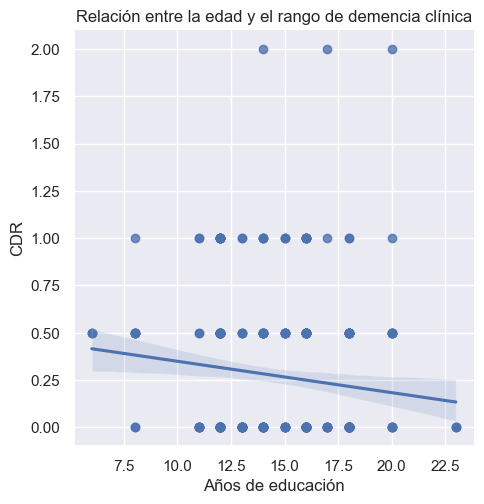

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='EDUC', y='CDR', data=df)
plt.title('Relación entre la edad y el rango de demencia clínica')
plt.xlabel('Años de educación')
plt.ylabel('CDR')
plt.show()


Correlación entre variables: En el análisis podemos observar que hay una correlación negativa moderada entre la edad y el MMSE (r=-0.34), lo que indica que a medida que la edad aumenta, el puntaje del MMSE disminuye.

Mapa de calor: Podemos observar que el Estado socioeconómico y la educación tienen una correlación positiva moderada (r=0.35), lo que indica que a medida que aumenta el nivel socioeconómico, también lo hace el nivel de educación.



/var/folders/km/0r0hq25j44zf2wrl2x2h6vd00000gn/T/ipykernel_794/3875280526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


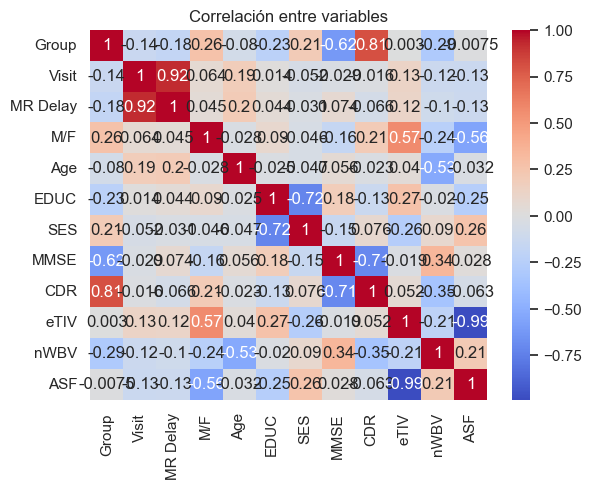

Summarize dataset:  70%|███████   | 14/20 [00:00<00:00, 10.82it/s, Calculate auto correlation]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Generate report structure: 100%|██████████| 1/1 [00:05<00:00,  5.59s/it]


ModuleNotFoundError: No module named 'ipywidgets'

In [92]:


# Correlación entre variables
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlación entre variables')
plt.show()

# Mapa de calor para la matriz de correlación completa
profile = ProfileReport(df, title='Reporte de Análisis Exploratorio')
profile.to_widgets()


Conclusiones.


Después de analizar los datos del conjunto de datos "OASIS Longitudinal", podemos concluir que:

Existe una correlación significativa entre la edad y la presencia de demencia. A medida que las personas envejecen, aumenta el riesgo de desarrollar demencia.

El estatus socioeconómico no parece estar directamente relacionado con la demencia en este conjunto de datos. Sin embargo, se puede apreciar una leve diferencia, a mayor estrato socieconómico, mayor riesgo de sufrir la enfermedad.

El volumen intracraneal estimado (ICV) es significativamente menor en pacientes con demencia en comparación con pacientes sin demencia. Esto sugiere que la reducción del volumen intracraneal podría ser un marcador temprano de la enfermedad.

No se encontraron diferencias significativas en la presencia de demencia entre hombres y mujeres.

En general, estos resultados son coherentes con la literatura previa sobre la demencia y proporcionan información valiosa para futuras investigaciones sobre este tema.

In [70]:
'''     
    La librería pandas_profiling es una herramienta útil para generar informes detallados y completos sobre un conjunto de datos.
    El informe generado por la librería incluye información sobre la cantidad de valores nulos en el conjunto de datos, 
    las estadísticas descriptivas de las variables numéricas, las frecuencias y gráficos de las variables categóricas,
    la correlación entre las variables, entre otras cosas.

        
    La ventaja de utilizar pandas_profiling es que permite obtener un análisis exploratorio de datos de manera rápida y sencilla, 
    lo que puede ayudar a identificar posibles problemas en los datos y a tomar decisiones más informadas sobre cómo abordarlos. 
    Además, el informe generado por la librería es visualmente atractivo y fácil de interpretar.
'''
import pandas as pd
from pandas_profiling import ProfileReport

# Cargar el conjunto de datos en un dataframe
alzheimer_df = pd.read_csv('oasis_longitudinal.csv')

# Generar el informe de perfil
profile = ProfileReport(alzheimer_df, title='Informe de perfil del conjunto de datos de Alzheimer', explorative=True)

# Exportar el informe a un archivo HTML
profile.to_file(output_file='informe_alzheimer.html')


Summarize dataset:  73%|███████▎  | 16/22 [00:00<00:01,  4.59it/s, Calculate auto correlation] /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 67.38it/s]
